In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score, matthews_corrcoef, recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import BaggingClassifier

In [ ]:
#downloading file

file_id='1nW2d5VHQrT59J1lV2KLnwrLM54yXEilz'
file_name='Threats (1).csv'
url=f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, file_name,quiet=False)
df=pd.read_csv(file_name)
df

Downloading...
From: https://drive.google.com/uc?id=1nW2d5VHQrT59J1lV2KLnwrLM54yXEilz
To: /content/Threats (1).csv
100%|██████████| 25.9M/25.9M [00:00<00:00, 44.7MB/s]


,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
#checking data types
df.dtypes


,0
Unnamed: 0,int64
id,int64
dur,float64
proto,object
service,object
state,object
spkts,int64
dpkts,int64
sbytes,int64
dbytes,int64


In [ ]:
df['proto'].unique() #try this w one hot encoding later

array(['tcp', 'udp', 'arp', 'ospf', 'igmp', 'ddp', 'ipv6-frag', 'cftp',
       'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc', 'sat-mon', 'cphb',
       'sun-nd', 'iso-ip', 'xtp', 'il', 'unas', 'mfe-nsp', '3pc',
       'ipv6-route', 'idrp', 'bna', 'swipe', 'kryptolan', 'cpnx', 'rsvp',
       'wb-mon', 'vmtp', 'ib', 'dgp', 'eigrp', 'ax.25', 'gmtp', 'pnni',
       'sep', 'pgm', 'idpr-cmtp', 'zero', 'rvd', 'mobile', 'narp', 'fc',
       'pipe', 'ipcomp', 'ipv6-no', 'sat-expak', 'ipv6-opts', 'snp',
       'ipcv', 'br-sat-mon', 'ttp', 'tcf', 'nsfnet-igp', 'sprite-rpc',
       'aes-sp3-d', 'sccopmce', 'sctp', 'qnx', 'scps', 'etherip', 'aris',
       'pim', 'compaq-peer', 'vrrp', 'iatp', 'stp', 'l2tp', 'srp', 'sm',
       'isis', 'smp', 'fire', 'ptp', 'crtp', 'sps', 'merit-inp', 'idpr',
       'skip', 'any', 'larp', 'ipip', 'micp', 'encap', 'ifmp', 'tp++',
       'a/n', 'ipv6', 'i-nlsp', 'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp',
       'ddx', 'ippc', 'visa', 'secure-vmtp', 'uti', 'vines', 'crudp

In [ ]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
df['state'].unique()

array(['FIN', 'CON', 'INT', 'REQ', 'RST'], dtype=object)

In [ ]:

df['service'].unique()

array(['-', 'dns', 'ssh', 'ftp-data', 'http', 'ftp', 'smtp', 'radius',
       'pop3', 'dhcp', 'ssl', 'snmp', 'irc'], dtype=object)

ccp-cost complexity pruning


In [ ]:
#############df.proto=LabelEncoder().fit_transform(df.proto)

#label encoder
df.attack_cat=LabelEncoder().fit_transform(df.attack_cat)
label_encoder = LabelEncoder()


x=df.drop('attack_cat',axis=1)
y=df['attack_cat']

x_encoded=pd.get_dummies(x, columns=['service','state', 'proto'])

# Converts missing values to nan
x_encoded = x_encoded.replace('-', pd.NA)
for column in x_encoded.select_dtypes(include=['object']).columns:

    x_encoded[column] = pd.to_numeric(x_encoded[column], errors='coerce')


x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=67) #20% for testing
clf_dt=DecisionTreeClassifier(ccp_alpha=0.0001, min_impurity_decrease=1e-06, min_samples_leaf=5,random_state=67) #pruning and min impurity decrease?
clf_dt.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.0001, min_impurity_decrease=1e-06,
                       min_samples_leaf=5, random_state=67)

Optimal max_depth: 15
Accuracy with optimal max_depth (15): 0.78


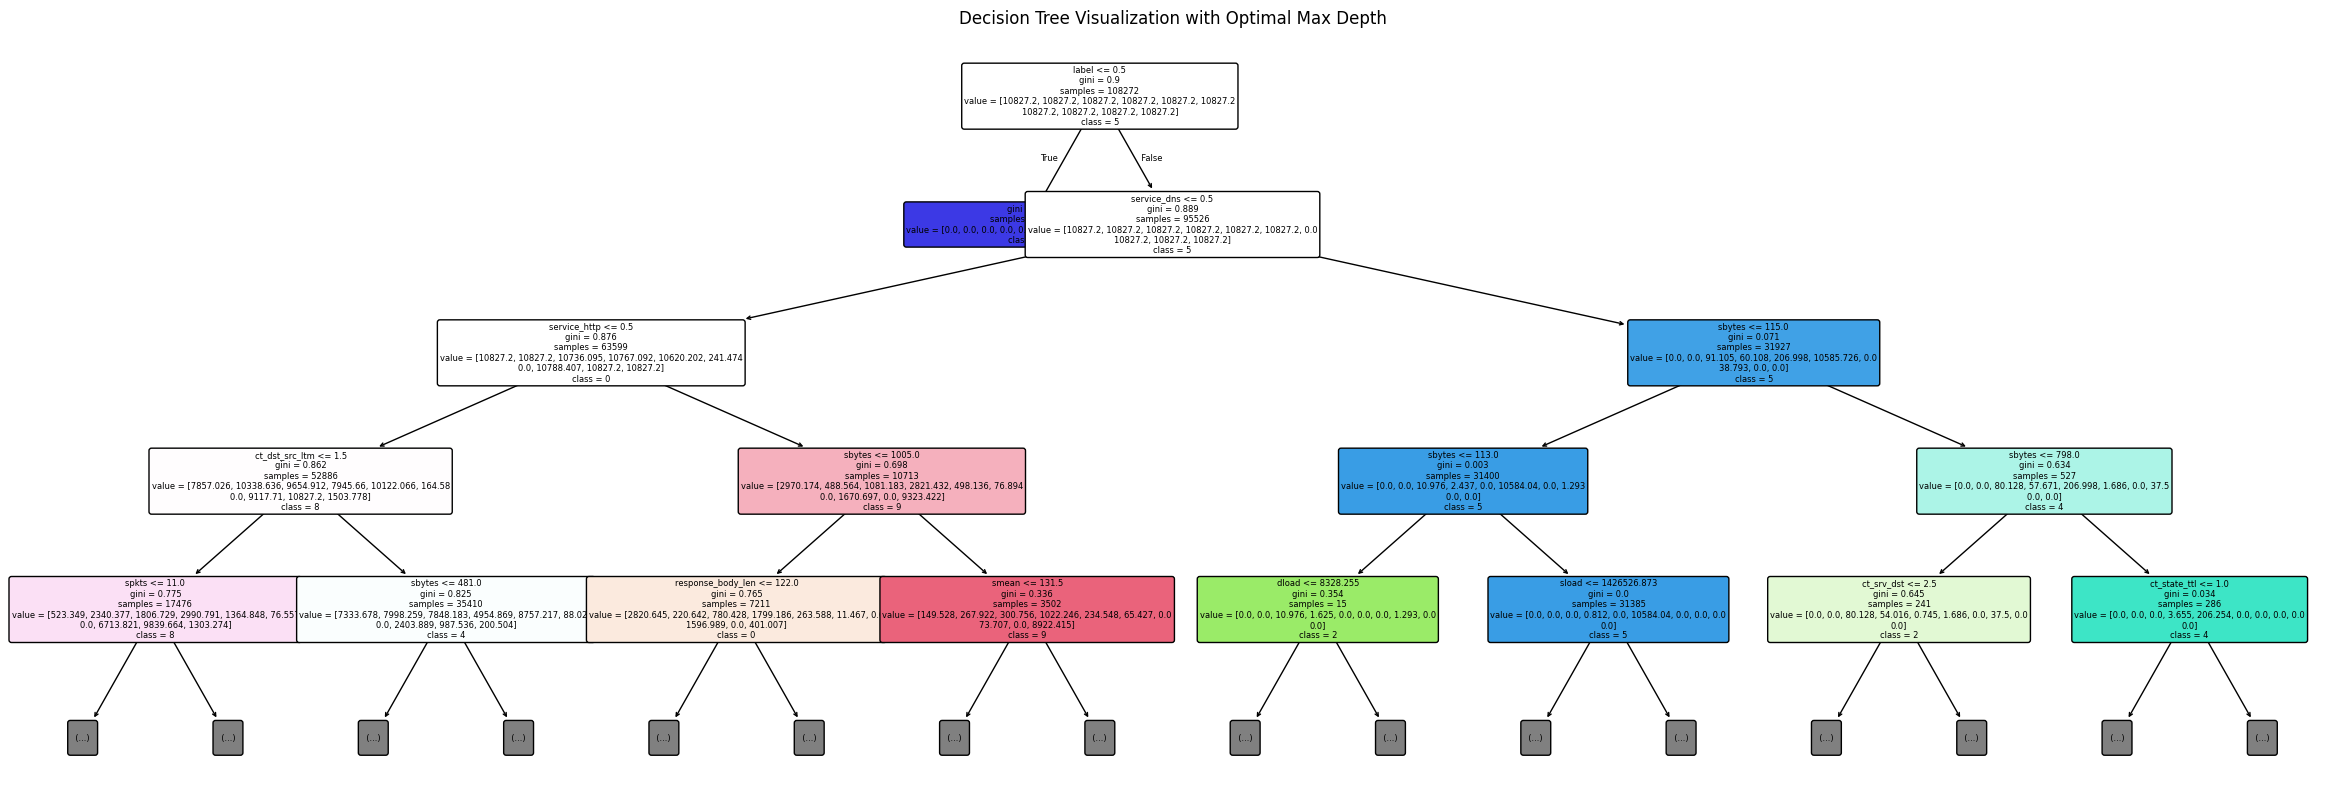

In [ ]:
param_grid = {'max_depth': np.arange(1, 21)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=77, class_weight='balanced'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
optimal_depth = grid_search.best_params_['max_depth']
print(f"Optimal max_depth: {optimal_depth}")

clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=77, class_weight='balanced')
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

acc = accuracy_score(y_test, predictions)
print(f"Accuracy with optimal max_depth ({optimal_depth}): {acc:.2f}")
plt.figure(figsize=(30, 10))
label_encoder.fit(y_train)
class_names_str = [str(name) for name in label_encoder.classes_]
plot_tree(
    clf,
    feature_names=x_train.columns,
    class_names=class_names_str,
    filled=True,
    rounded=True,
    fontsize=6,
    max_depth=4
)
plt.title("Decision Tree Visualization with Optimal Max Depth")
plt.show()

In [ ]:
probabilities = clf.predict_proba(x_test)

acc = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, probabilities, multi_class='ovo', average='macro') #area under curve
f1 = f1_score(y_test, predictions, average='macro')
mcc = matthews_corrcoef(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')

print(f"Accuracy: {acc:.2f}")
print(f"AUC: {auc:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Recall: {recall:.2f}") #all impurity methods

Accuracy: 0.78
AUC: 0.93
F1 score: 0.64
MCC: 0.74
Recall: 0.72


In [ ]:

bag_clf = BaggingClassifier(clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(x_train, y_train)
predictions = bag_clf.predict(x_test)
probabilities = bag_clf.predict_proba(x_test)

acc = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, probabilities, multi_class='ovo', average='macro') #area under curve
f1 = f1_score(y_test, predictions, average='macro')
mcc = matthews_corrcoef(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')
print("Acuuracy scores after bagging: ")
print(f"Accuracy: {acc:.2f}")
print(f"AUC: {auc:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Recall: {recall:.2f}")

Acuuracy scores after bagging: 
Accuracy: 0.79
AUC: 0.90
F1 score: 0.45
MCC: 0.74
Recall: 0.45


In [ ]:
ada_clf = AdaBoostClassifier(bag_clf, n_estimators=200, algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(x_test)
probabilities = ada_clf.predict_proba(x_test)

acc = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, probabilities, multi_class='ovo', average='macro') #area under curve
f1 = f1_score(y_test, predictions, average='macro')
mcc = matthews_corrcoef(y_test, predictions)
recall = recall_score(y_test, predictions, average='macro')


print(f"Accuracy: {acc:.2f}")
print(f"AUC: {auc:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"Recall: {recall:.2f}")
